In [4]:
!pip install plotly imblearn seaborn

# Notebook OF LUNG CANCER DETECTION MODEL EVALUATION

## Project Topic

This project is about creating lung cancer detection using Supervised Machine learning Algorithms. This project outcome is to help the physicians to help and save time and cost for identifying the nodules present in CT lung images in the early stage of lung cancer. Since that process is the time consuming and very critical

Motive

The effectiveness of the cancer prediction system helps people to know their cancer risk at a low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


## Data

Data is a Public kaggle dataset which is called Lung Cancer.
source link: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data

In-Text Citation: (Hong & Yang, 1991)

Reference List Entry:

Hong, Z. Q., & Yang, J. Y. (1991). Optimal Discriminant Plane for a Small Number of Samples and Design Method of Classifier on the Plane Lung Cancer Dataset. Kaggle. https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data

License: CC BY-NC-SA 4.0

Format: CSV

Size:

RangeIndex: 309 entries,
Data Types: int64(14), object(2)


In [6]:
dataset = pd.read_csv("./survey_lung_cancer.csv")

Lets Exploring the Data Analysis (EDA)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Data doesn’t contain any null values in all of the columns and only two columns are object types while all of them are 64 bits integer type.We compute this by using the info method on dataframe object.


In [8]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Data Cleaning

Found that GENDER and LUNG_CANCER columns values are categories.

In [9]:
dataset['LUNG_CANCER']

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

Let Check Null

In [10]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Checking Dimensions of Data

In [11]:
dataset.shape

(309, 16)

In [12]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Summary

Age Distribution: The dataset covers a range of ages from 21 to 87, with the majority (50%) failing between 57 and 69 years.

Categorical Variables: The statistics for other variables suggest that they might represent binary attributes.


For the detail of data distribution please check the output of


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical initial step in the data analysis process that involves exploring and summarizing the main characteristics, patterns, and relationships present in a dataset. It's performed to gain insights, discover patterns, and identify potential issues or trends within the data.
Why Perform EDA?

EDA helps understand the structure, nature, and content of the dataset. It gives an overview of what the data contains and how it's organized.

EDA uncovers patterns, trends, correlations, and relationships among variables, helping to generate hypotheses and insights.


It helps identify potential errors, outliers, missing values, or inconsistencies in the data that may impact subsequent analyses or modeling.


EDA aids in selecting relevant features (variables) for modeling and in creating new informative features through feature engineering.


### Detecting Outliers





In [13]:
def isOutliner(Q1,Q3,IQR,data):
    threshold = 1.5
    outliners = 0
    row = 0
    for value in data:
        if(((value < (Q1 - threshold * IQR)) | (value > (Q3 + threshold * IQR)))):
           outliners +=1
           print(value,row) # uncomment out to see the detail row  and value of the outliner

        row +=1
    print(f'Outliners {outliners}')

for column in dataset.describe().columns:
    print(column)

    d = dataset.describe()[column].to_numpy()
    Q1 = d[4]
    Q3 = d[6]
    IQR = Q3 - Q1
    res = isOutliner(Q1,Q3,IQR,dataset[column])

AGE
21 22
38 238
Outliners 2
SMOKING
Outliners 0
YELLOW_FINGERS
Outliners 0
ANXIETY
Outliners 0
PEER_PRESSURE
Outliners 0
CHRONIC DISEASE
Outliners 0
FATIGUE 
Outliners 0
ALLERGY 
Outliners 0
WHEEZING
Outliners 0
ALCOHOL CONSUMING
Outliners 0
COUGHING
Outliners 0
SHORTNESS OF BREATH
Outliners 0
SWALLOWING DIFFICULTY
Outliners 0
CHEST PAIN
Outliners 0


In [14]:
con_col = ['AGE']
cat_col=[]
for i in dataset.columns:
    if i!='AGE':
        cat_col.append(i)

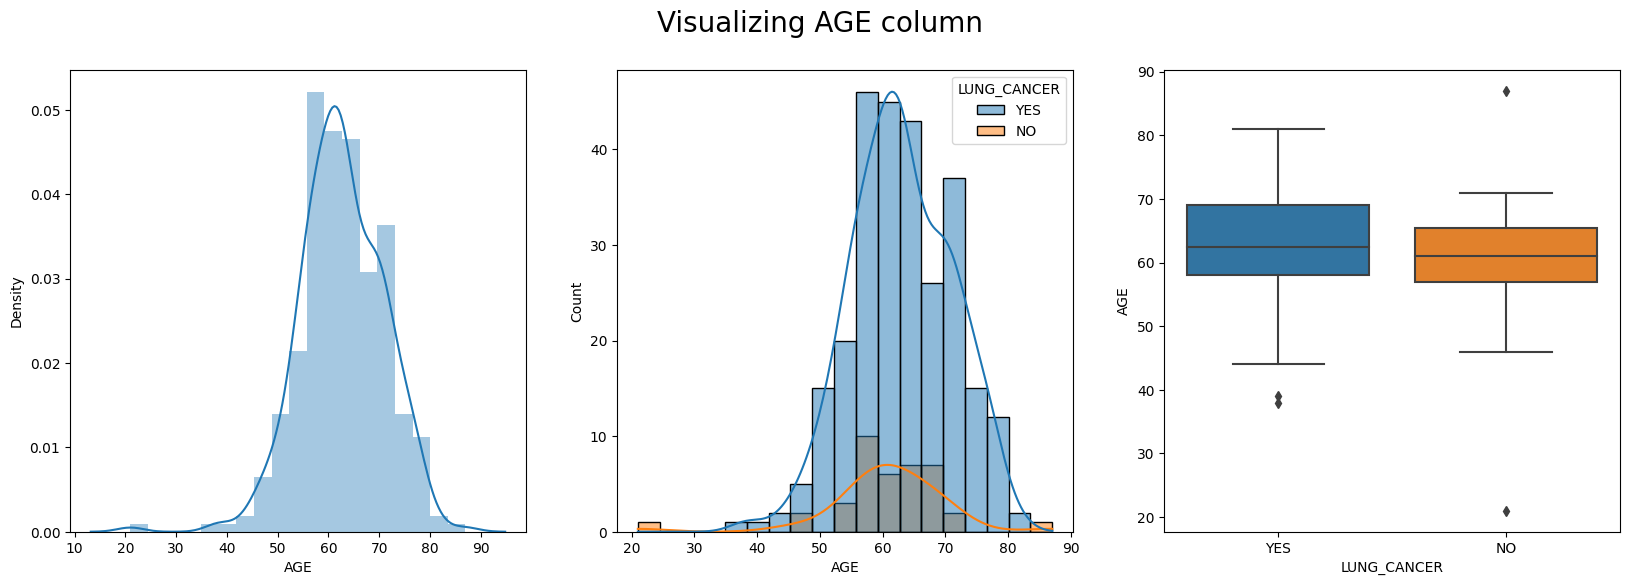

In [15]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(dataset['AGE'],ax=ax[0])
sns.histplot(data =dataset,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=dataset['LUNG_CANCER'],y=dataset['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

In [16]:
hist_data =[dataset["AGE"].values]
group_labels = ['AGE']
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

Some outliers are present in the dataset. Inferred from box-plot.
Most common age ranges from 50-70. This was also inferred from describe method.

I used Interquartile range, Q1 AND Q3 to detect outliers in the dataset and found 2 in AGE column the value and row are like this

Value, Row (21,22),(38,238)

In [17]:
dataset = dataset.drop([22,238])

Text(0.5, 0.98, 'Visualizing Categorical Columns')

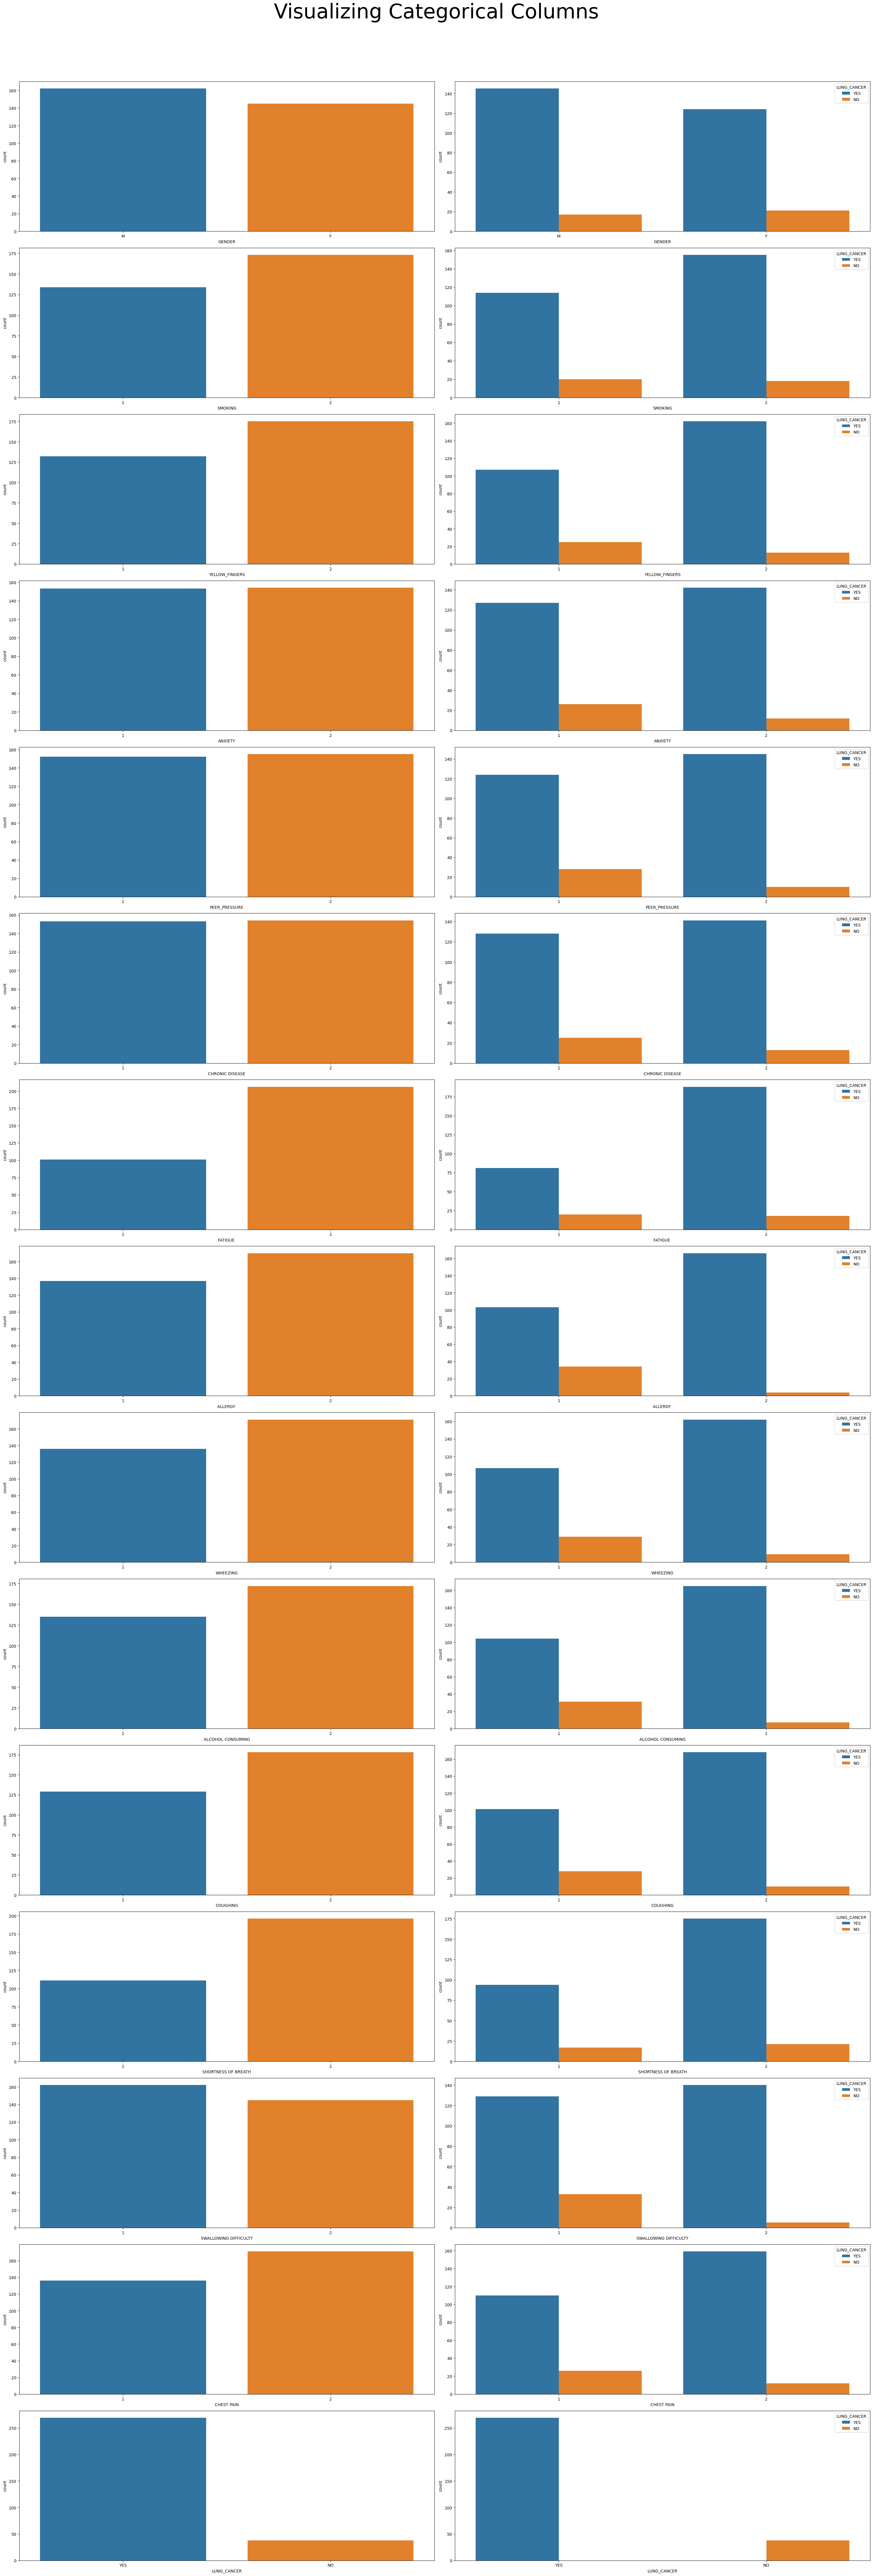

In [18]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=dataset,x=i,ax=ax[index,0])
    sns.countplot(data=dataset,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

There is a huge imabalance present in the dataset. Samples with Lung Cancer are present in higher numbers.
All the observations made from describe function is confirmed here

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['LUNG_CANCER']=encoder.fit_transform(dataset['LUNG_CANCER'])
dataset['GENDER']=encoder.fit_transform(dataset['GENDER'])
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

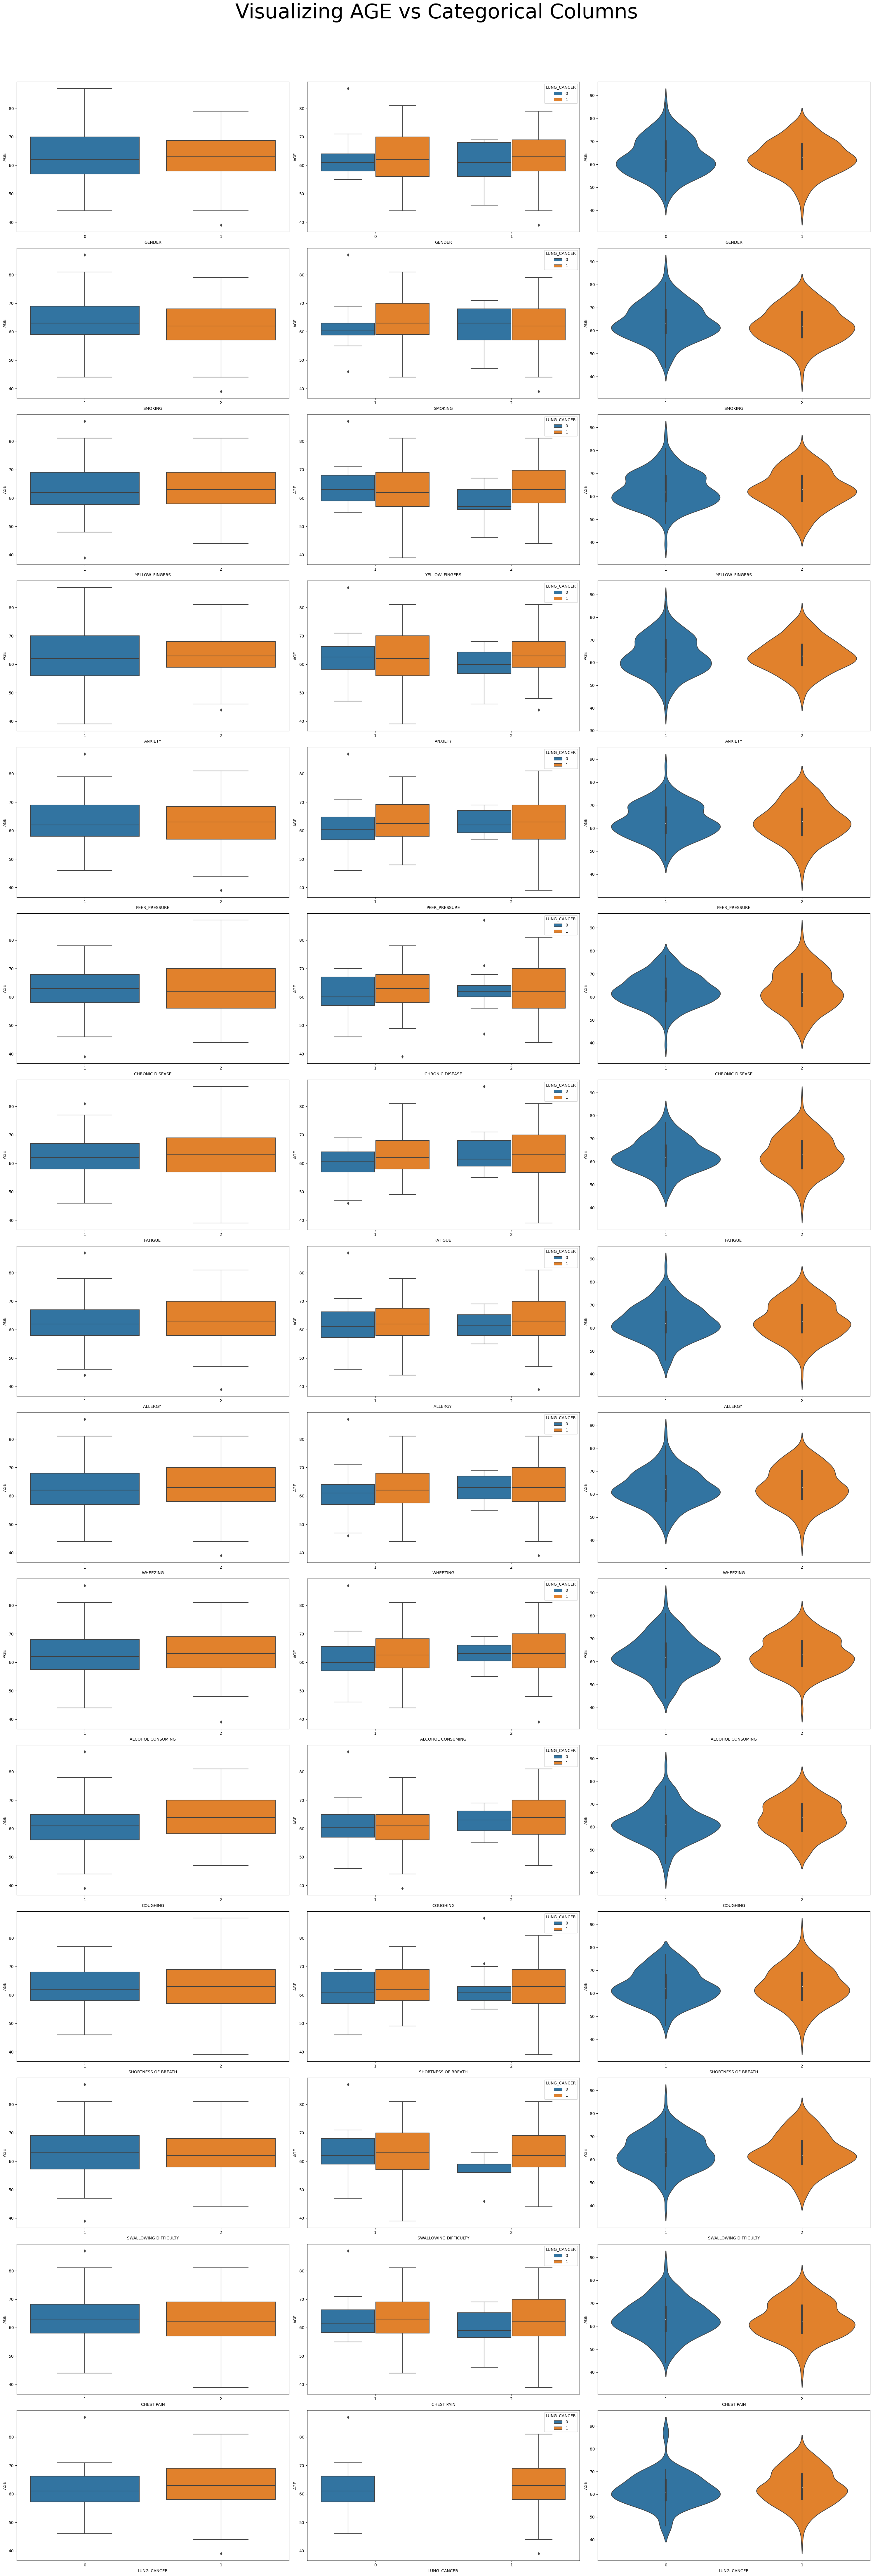

In [20]:

fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=dataset[i],y=dataset['AGE'],ax=ax[index,0])
    sns.boxplot(x=dataset[i],y=dataset['AGE'],ax=ax[index,1],hue=dataset['LUNG_CANCER'])
    sns.violinplot(x=dataset[i],y=dataset['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

Checking Corration Between the features

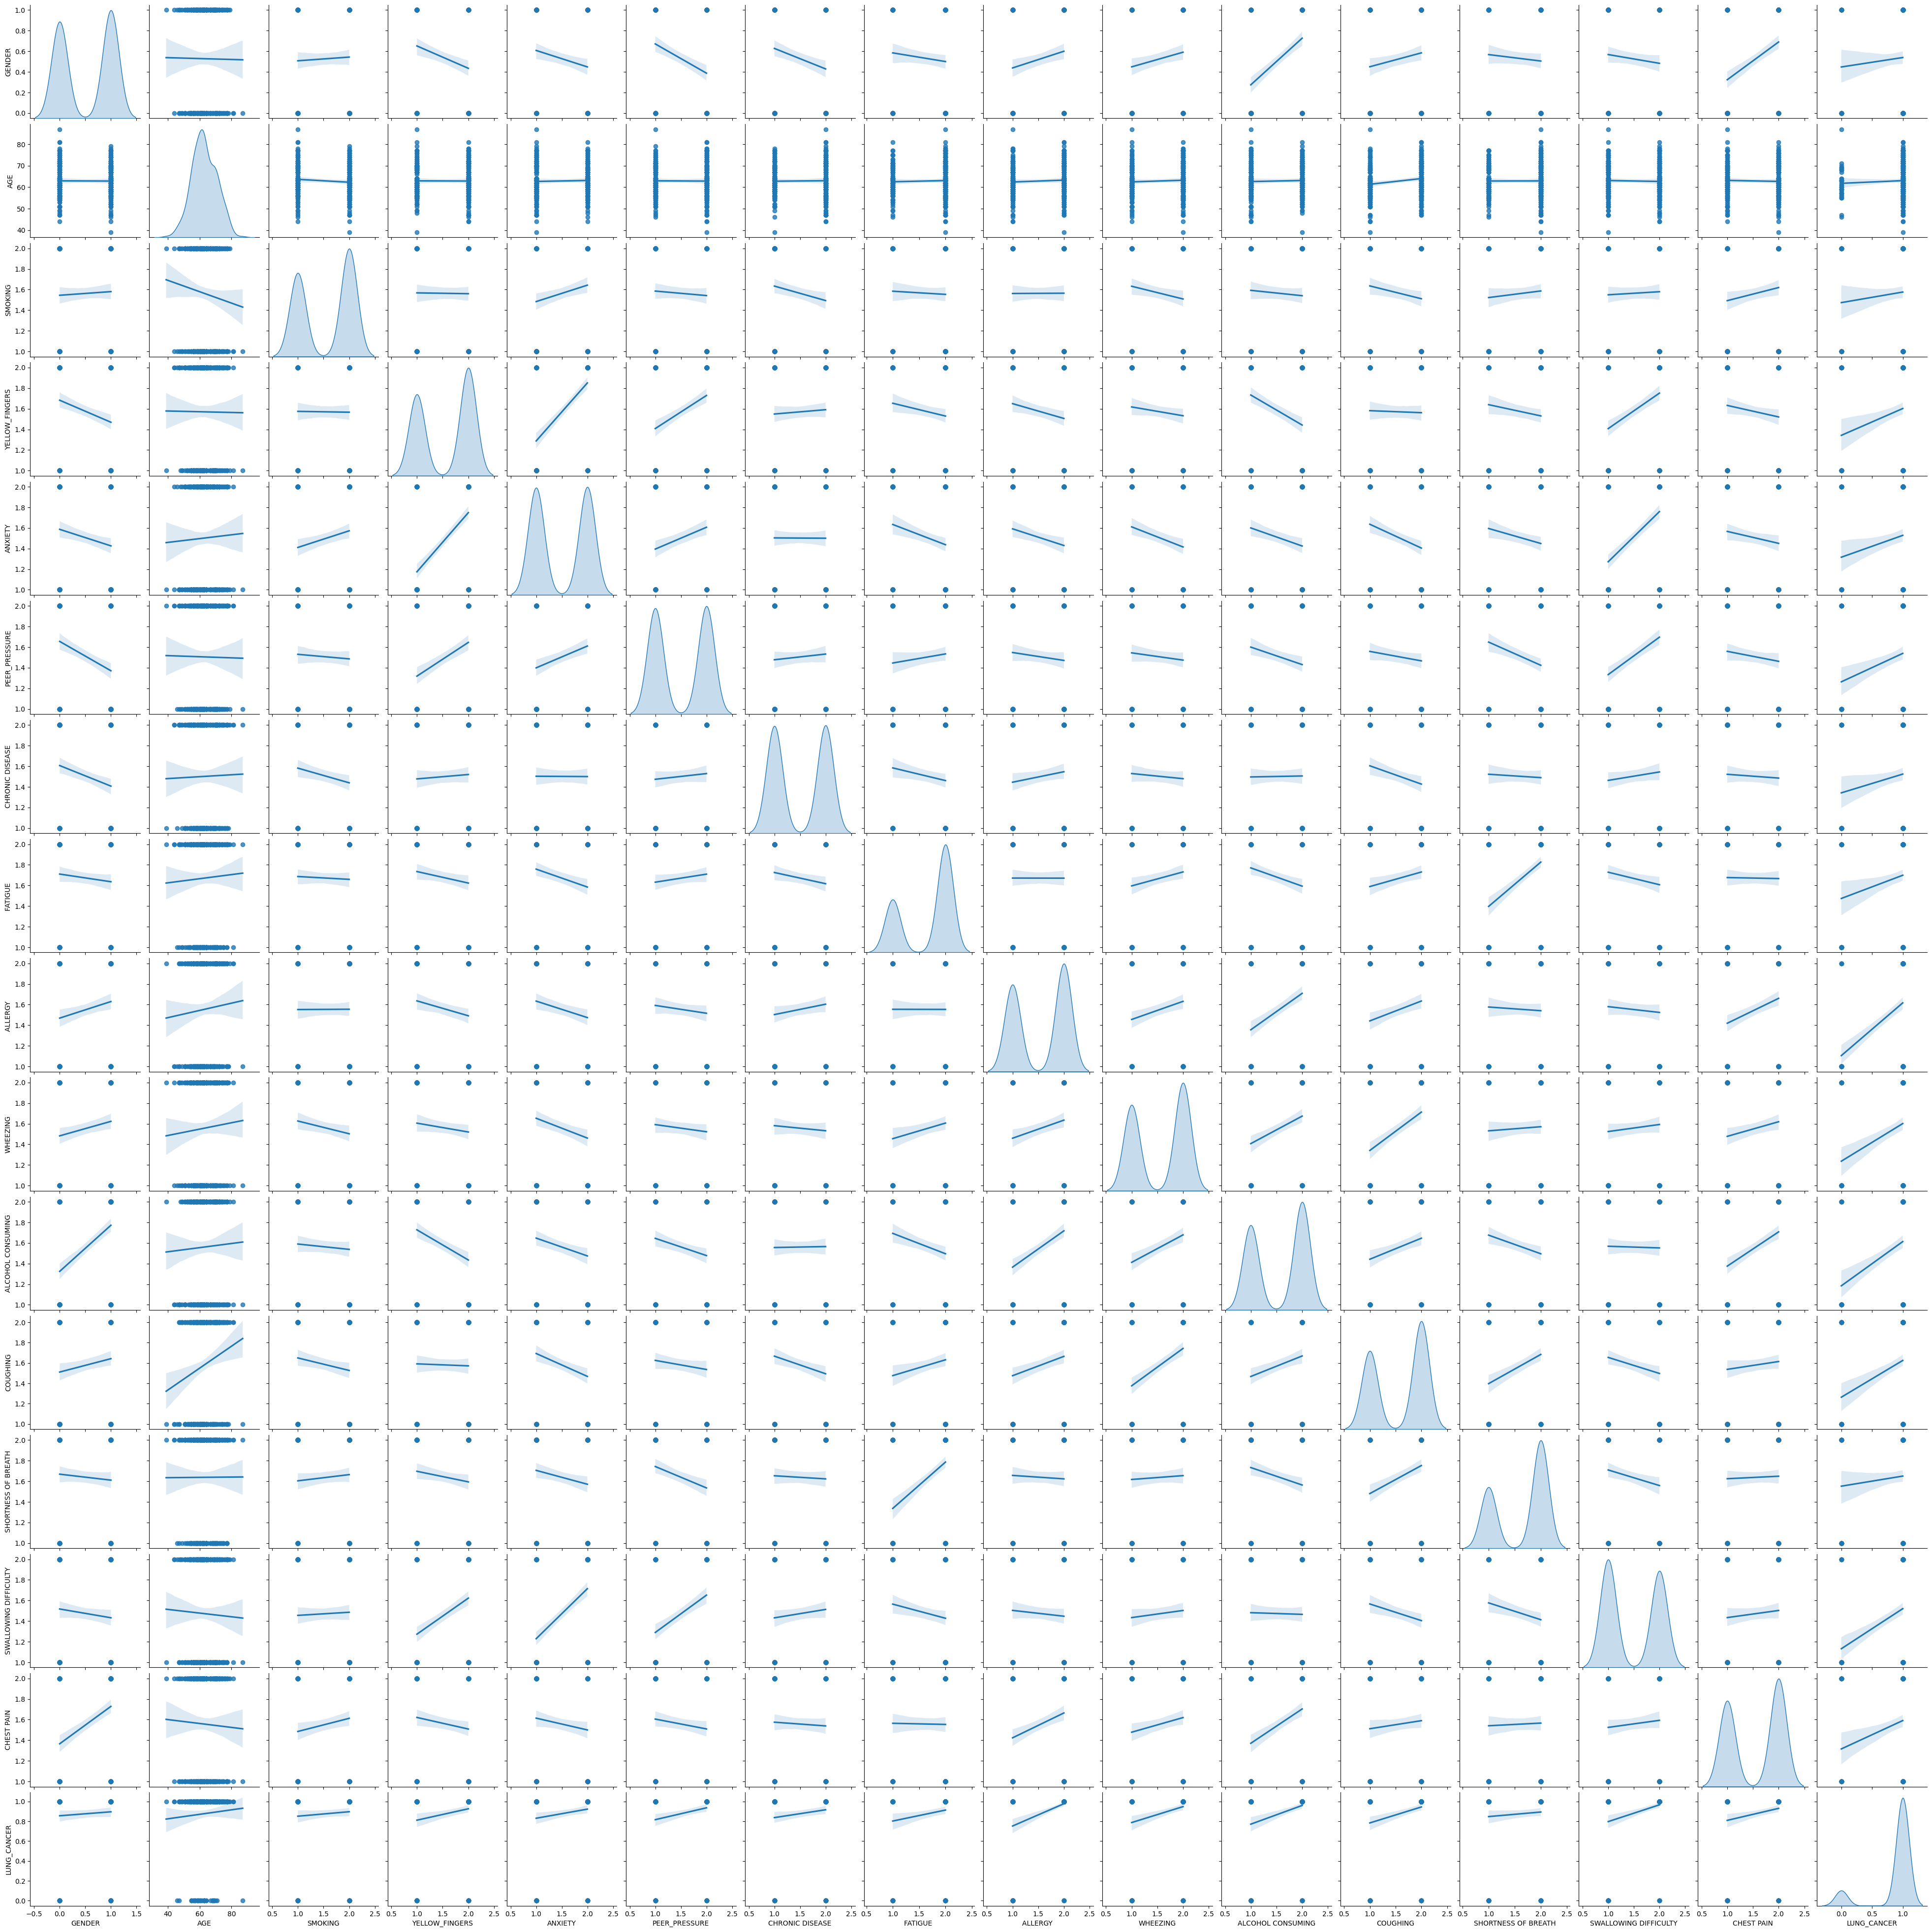

In [21]:
sns.pairplot(dataset, kind='reg', diag_kind='kde')

In [22]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [23]:
correlation_matrix = dataset.corr()
correlation_matrix

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.006791,0.035654,-0.215419,-0.160036,-0.284379,-0.199184,-0.079205,0.161352,0.141404,0.450061,0.133135,-0.060116,-0.085143,0.364699,0.060469
AGE,-0.006791,1.000000,-0.086393,-0.005625,0.028656,-0.008275,0.014351,0.032965,0.054867,0.048225,0.031403,0.169378,0.002370,-0.027761,-0.029696,0.053389
SMOKING,0.035654,-0.086393,1.000000,-0.008167,0.160496,-0.043945,-0.141627,-0.029141,0.002668,-0.123778,-0.051937,-0.123831,0.062206,0.030126,0.127439,0.068080
YELLOW_FINGERS,-0.215419,-0.005625,-0.008167,1.000000,0.568670,0.324319,0.042306,-0.118004,-0.144343,-0.085771,-0.292229,-0.019539,-0.105808,0.347211,-0.112262,0.173039
ANXIETY,-0.160036,0.028656,0.160496,0.568670,1.000000,0.211706,-0.003268,-0.184904,-0.160892,-0.193818,-0.174302,-0.228202,-0.139923,0.486271,-0.115129,0.139696
PEER_PRESSURE,-0.284379,-0.008275,-0.043945,0.324319,0.211706,1.000000,0.055346,0.083107,-0.076415,-0.069978,-0.168538,-0.090674,-0.216387,0.362678,-0.096208,0.181716
CHRONIC DISEASE,-0.199184,0.014351,-0.141627,0.042306,-0.003268,0.055346,1.000000,-0.115577,0.101214,-0.049555,0.009448,-0.175408,-0.031447,0.081739,-0.036440,0.119915
FATIGUE,-0.079205,0.032965,-0.029141,-0.118004,-0.184904,0.083107,-0.115577,1.000000,-0.000999,0.143156,-0.187353,0.148325,0.439845,-0.129098,-0.010365,0.157849
ALLERGY,0.161352,0.054867,0.002668,-0.144343,-0.160892,-0.076415,0.101214,-0.000999,1.000000,0.175568,0.353215,0.191607,-0.034563,-0.056349,0.241525,0.339090
WHEEZING,0.141404,0.048225,-0.123778,-0.085771,-0.193818,-0.069978,-0.049555,0.143156,0.175568,1.000000,0.266804,0.370036,0.038589,0.068755,0.141942,0.242245


## Correlation Matrix

Here Anxiety and Yellow fingers (0.57) columns are more correlated than other columns and rest are (Yellow Fingers & Peer Pressure, 0.32 ), (Anxiety & Swallowing Difficulties, 0.49), (Wheezing & coughing , 0.37), (Fatigue & Shortness of Breath, 0.44)


<Axes: >

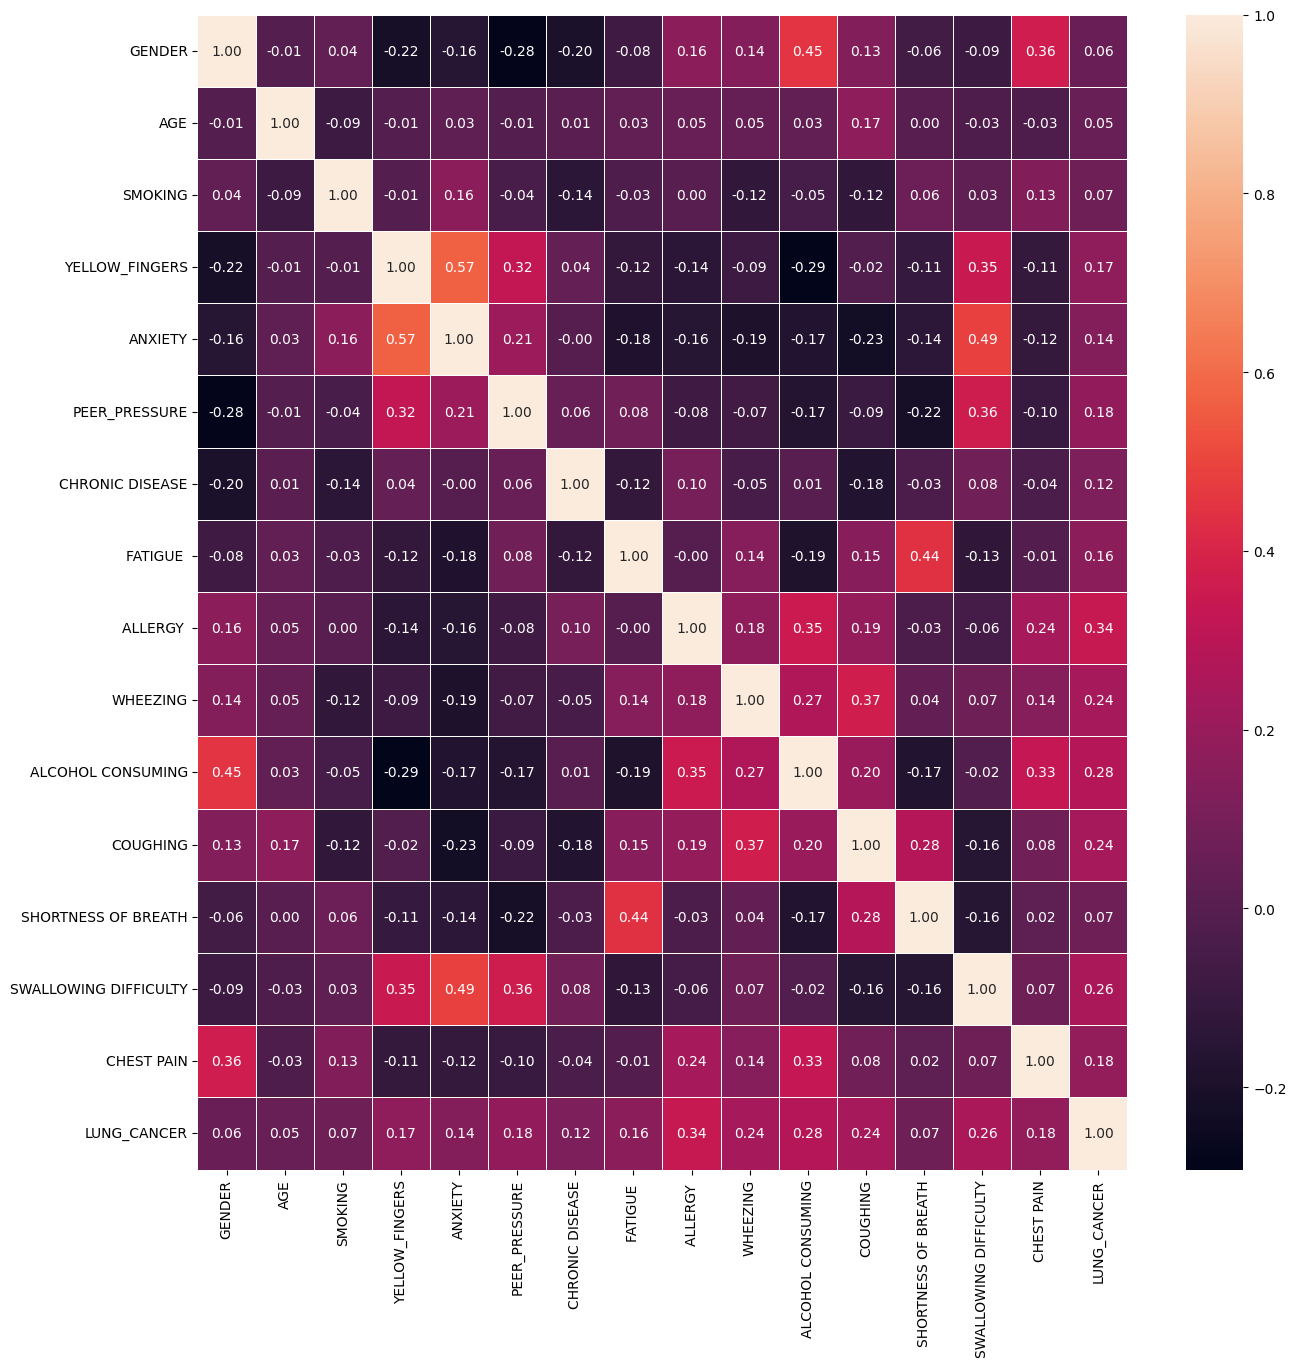

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [25]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

### Analyzing GENDER Column


<Axes: xlabel='GENDER', ylabel='count'>

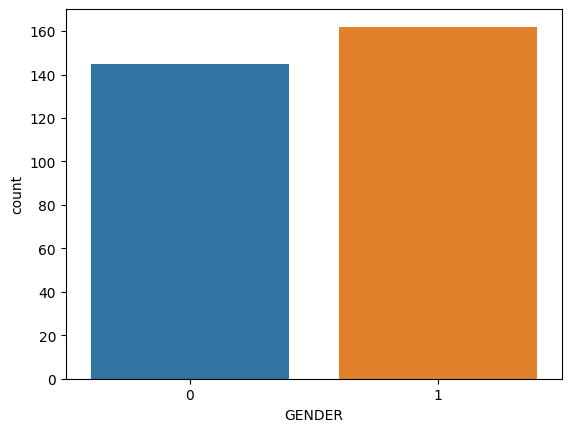

In [26]:
sns.countplot(x = 'GENDER',data = dataset)

### Analyzing SMOKING Column

<Axes: xlabel='SMOKING', ylabel='count'>

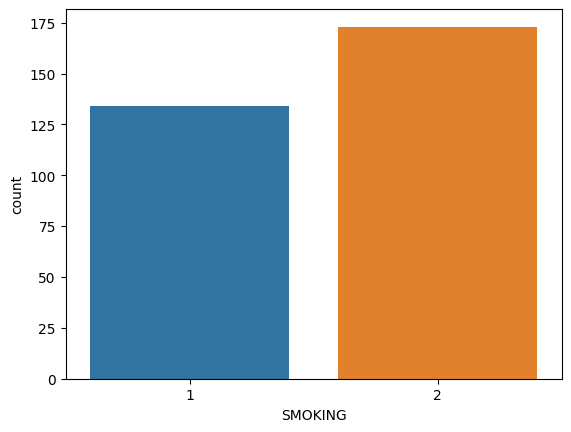

In [27]:
sns.countplot(x = 'SMOKING',data = dataset)

### Analyzing ALLERGY Column

<Axes: xlabel='ALLERGY ', ylabel='count'>

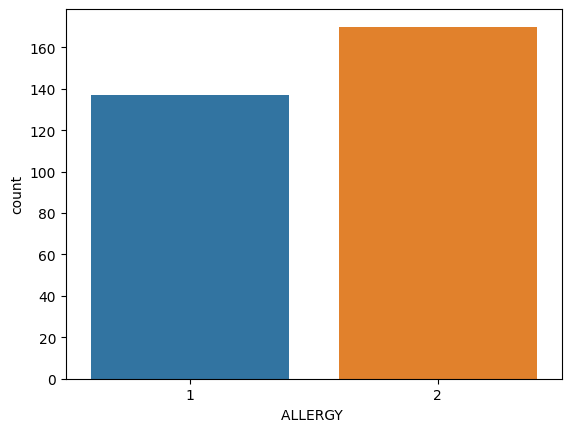

In [28]:
sns.countplot(x = 'ALLERGY ',data = dataset)

### Analyzing Lung Cancer Column


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

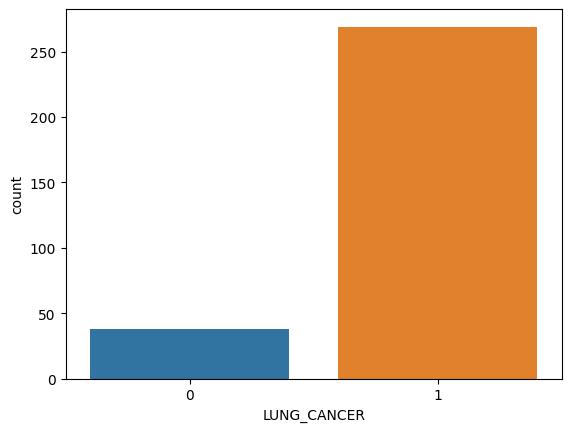

In [29]:
sns.countplot(x = 'LUNG_CANCER',data = dataset)

### Analyzing YELLOW FINGERS Column


<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

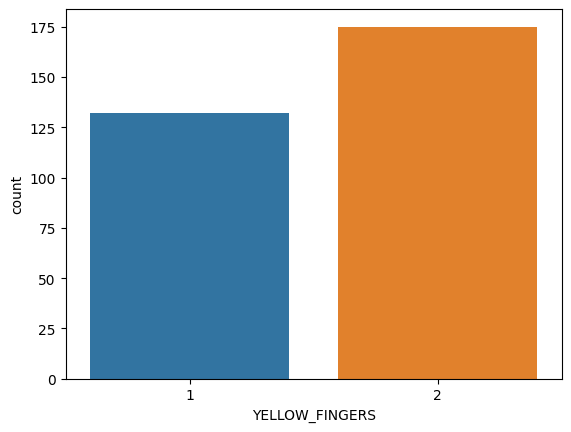

In [30]:
sns.countplot(x = 'YELLOW_FINGERS',data = dataset)

### Analyzing CHRONIC DISEASE Column


<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

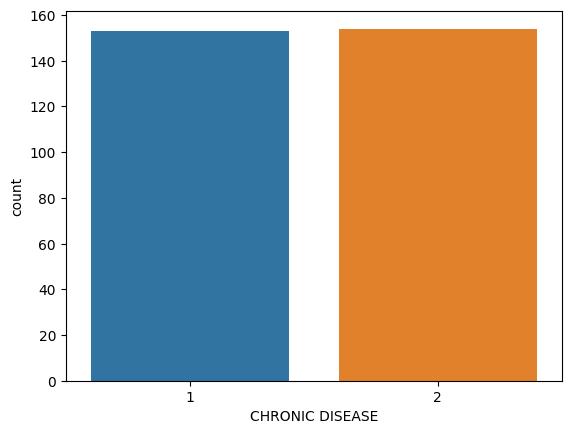

In [31]:
sns.countplot(x = 'CHRONIC DISEASE',data = dataset)

### PIE CHAR OF LUNG CANCER COLUMN

In [32]:
values = dataset['LUNG_CANCER'].value_counts().tolist()
names = ['Yes','No']

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])



### Data Preprocessing

In [33]:
X=dataset.drop(['LUNG_CANCER'],axis=1)
y=dataset['LUNG_CANCER']

In [34]:
X.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [35]:
X.columns[2:]

Index(['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [36]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


### Over Sampling

In [37]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (403, 15)
Test shape: (135, 15)


### Scaling of AGE Column

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
402,0,-0.444496,0,0,0,1,0,1,0,1,0,1,1,0,1
145,1,-1.533444,0,1,0,0,1,1,1,1,1,1,1,0,1
482,1,-0.172259,0,0,1,1,1,0,0,0,1,0,0,0,0
167,1,-2.486273,0,1,0,1,1,1,0,1,0,0,1,1,1
159,0,-0.988970,0,0,0,1,1,1,1,1,1,0,0,0,1


In [40]:
values = y_train.value_counts().tolist()
names = ['Yes','No']

px.pie(y_train, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

In [41]:
values = X_train['YELLOW_FINGERS'].value_counts().tolist()
names = ['1','2']

px.pie(X_train['YELLOW_FINGERS'], values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

Above diagram is the data distribution of the Yellow Finger column after resampling on the Train Set which was significantly imbalanced on the original data.

## Model Building

Here we will use all of the supervised algorithms such as:


    Support Vector Machine
    Random Forest Classifier
    KNeighborsClassifier
    Ann
    Voting Classifier
    Logistic Regression
    Decision Tree



<!-- ### Resampling SMOTE technique

Here the y_train column is LUNG_CANCER which is strongly imbalance in the original data which could hugely impact the model's accuracy. -->


## MODELS EVALUATION

In [42]:
raw_data_Modles = {}
resample_data_Modles = {}

In [43]:
#ultiliy functions
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

def getMetrics(y_true, y_pred,predTrain,y_train=y_train):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred),
    print(y_train.shape, predTrain.shape)
    train_accuracy = accuracy_score(y_train, predTrain)
    return {'accuracy': accuracy, 'train_accuracy':train_accuracy, 'precision':precision, 'recall': recall,'f1':f1, 'conf_matrix':conf_matrix, 'auc_roc':auc_roc, }


def getPredPredTrain(model,X_test=X_test, X_train=X_train):
    predTrain = model.predict(X_train)
    pred = model.predict(X_test)

    confusion_svc=confusion_matrix(y_test,pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_svc,annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")


    return predTrain,pred



In [44]:
def modelCreator(model,X,y):
    m = model()
    m.fit(X,y)
    return m

### Support Vector Machine¶


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [46]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]})

In [47]:
best_params = rcv.best_params_
best_params

{'gamma': 10, 'C': 1}

(403,) (135,) (135,) (403,)
(403,) (403,)


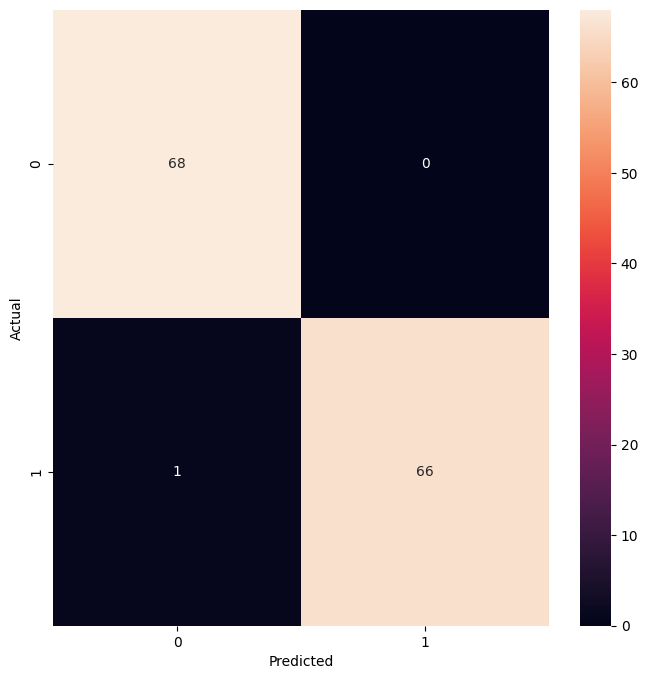

In [48]:

predTrain,pred =  getPredPredTrain(rcv)
print(predTrain.shape, pred.shape, y_test.shape,y_train.shape)
metrics = getMetrics(y_test, pred,predTrain,y_train)
raw_data_Modles['SVM'] = metrics


In [49]:
metrics

{'accuracy': 0.9925925925925926,
 'train_accuracy': 0.9975186104218362,
 'precision': 1.0,
 'recall': 0.9850746268656716,
 'f1': 0.9924812030075187,
 'conf_matrix': array([[68,  0],
        [ 1, 66]]),
 'auc_roc': (0.9925373134328358,)}

In [50]:
from sklearn.inspection import permutation_importance


result = permutation_importance(rcv, X_train, y_train, n_repeats=10, random_state=42)
important_features = result.importances_mean
important_features_dict = {}
for i in range(len(important_features)):
   important_features_dict[X_train.columns[i]] = important_features[i]


In [51]:
important_features_dict

{'GENDER': 0.23176178660049626,
 'AGE': 0.330272952853598,
 'SMOKING': 0.2372208436724565,
 'YELLOW_FINGERS': 0.23821339950372206,
 'ANXIETY': 0.23002481389578158,
 'PEER_PRESSURE': 0.2305210918114144,
 'CHRONIC DISEASE': 0.22034739454094293,
 'FATIGUE ': 0.25558312655086846,
 'ALLERGY ': 0.1858560794044665,
 'WHEEZING': 0.24044665012406946,
 'ALCOHOL CONSUMING': 0.22059553349875927,
 'COUGHING': 0.24367245657568234,
 'SHORTNESS OF BREATH': 0.23970223325062032,
 'SWALLOWING DIFFICULTY': 0.18138957816377171,
 'CHEST PAIN': 0.23746898263027288}

In [52]:
# important_features_dict
important_features_dict = dict(sorted(important_features_dict.items(), key=lambda x: x[1]))  # Sorting by values
important_features_dict


{'SWALLOWING DIFFICULTY': 0.18138957816377171,
 'ALLERGY ': 0.1858560794044665,
 'CHRONIC DISEASE': 0.22034739454094293,
 'ALCOHOL CONSUMING': 0.22059553349875927,
 'ANXIETY': 0.23002481389578158,
 'PEER_PRESSURE': 0.2305210918114144,
 'GENDER': 0.23176178660049626,
 'SMOKING': 0.2372208436724565,
 'CHEST PAIN': 0.23746898263027288,
 'YELLOW_FINGERS': 0.23821339950372206,
 'SHORTNESS OF BREATH': 0.23970223325062032,
 'WHEEZING': 0.24044665012406946,
 'COUGHING': 0.24367245657568234,
 'FATIGUE ': 0.25558312655086846,
 'AGE': 0.330272952853598}

### Random Forest Classifier¶


In [53]:
from sklearn.ensemble import RandomForestClassifier

def randomForestClassifer(inputX, inputY):



    param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    # Other hyperparameters...
    }

    # Create a Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(inputX, inputY)
    current_n_estimators = rf.n_estimators
    print("Current n_estimators:", current_n_estimators)

    return grid_search


Current n_estimators: 100
(403,) (403,)


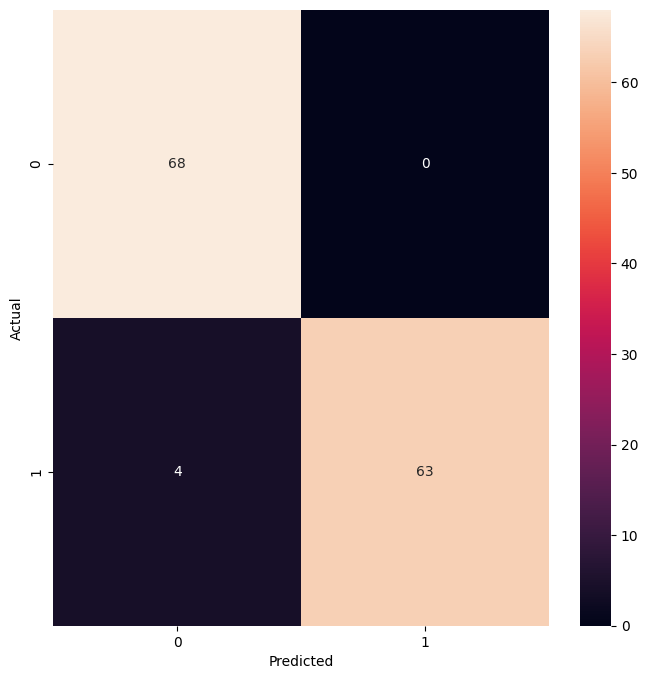

In [54]:

rfc = randomForestClassifer(X_train,y_train)
predTrain,pred =  getPredPredTrain(rfc,X_test, X_train)
metrics = getMetrics(y_test, pred,predTrain)
raw_data_Modles['rfc'] = metrics




In [55]:
metrics

{'accuracy': 0.9703703703703703,
 'train_accuracy': 1.0,
 'precision': 1.0,
 'recall': 0.9402985074626866,
 'f1': 0.9692307692307692,
 'conf_matrix': array([[68,  0],
        [ 4, 63]]),
 'auc_roc': (0.9701492537313433,)}

Important features are as follows.

In [56]:
best_rf = rfc.best_estimator_

important_features = best_rf.feature_importances_
important_features_dict = {}
columns = dataset.columns
for i in range(len(important_features)):
    important_features_dict[columns[i]] = important_features[i]
# important_features_dict
important_features_dict = sorted(important_features_dict.items(), key=lambda x: x[1])  # Sorting by values
important_features_dict

[('SMOKING', 0.030239799631369746),
 ('CHEST PAIN', 0.03129851508402938),
 ('GENDER', 0.03174780516765346),
 ('SHORTNESS OF BREATH', 0.037750702753936376),
 ('COUGHING', 0.04508787257886444),
 ('CHRONIC DISEASE', 0.046109224526233145),
 ('WHEEZING', 0.05267120168912815),
 ('ANXIETY', 0.05466307929053042),
 ('PEER_PRESSURE', 0.06341811362339615),
 ('FATIGUE ', 0.07310114624698125),
 ('YELLOW_FINGERS', 0.07419387248431407),
 ('SWALLOWING DIFFICULTY', 0.08291267534841562),
 ('ALCOHOL CONSUMING', 0.10170363879606785),
 ('ALLERGY ', 0.129002129586198),
 ('AGE', 0.14610022319288213)]

### KNeighborsClassifier

Here created the KNN model using GridSearchCV and trained on both imbalance data and resampled data.
The best n_neighbour for imbalance data and resampled data are 7 , 8 and for weights (uniform , distance) respectively.


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
def KNN(X,y):

    knn = KNeighborsClassifier()

    # Perform GridSearchCV
    param_grid = {
        'n_neighbors': [1,2,3,4,5,6,7,8,9],  # Values to try for n_neighbors
        'weights': ['uniform', 'distance'],  # Different weight options
        'metric': ['euclidean', 'manhattan']  # Different distance metrics
    }
    grid_search = GridSearchCV(knn,param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)


    return grid_search

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.9651851851851851
(403,) (403,)


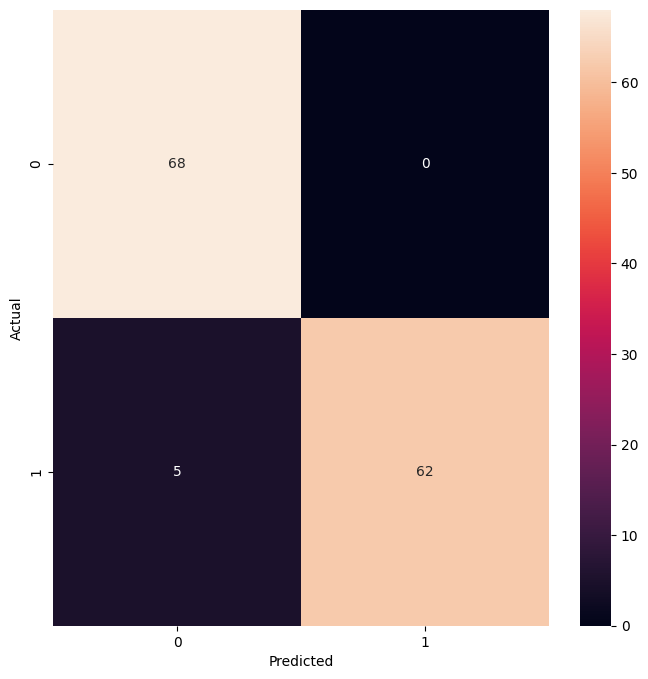

In [59]:
knn  = KNN(X_train,y_train)

predTrain,pred =  getPredPredTrain(knn)
metrics = getMetrics(y_test, pred,predTrain)
raw_data_Modles['KNN'] = metrics


 Feature Importance

In [60]:
from sklearn.inspection import permutation_importance


result = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42)
important_features = result.importances_mean
important_features_dict = {}
for i in range(len(important_features)):
    important_features_dict[X_train.columns[i]] = important_features[i]
# important_features_dict
important_features_dict = sorted(important_features_dict.items(), key=lambda x: x[1])  # Sorting by values
important_features_dict


[('YELLOW_FINGERS', 0.0),
 ('ANXIETY', 0.0),
 ('COUGHING', 0.0),
 ('SWALLOWING DIFFICULTY', 0.0),
 ('PEER_PRESSURE', 0.0014888337468982771),
 ('ALCOHOL CONSUMING', 0.00397022332506205),
 ('CHEST PAIN', 0.008684863523573172),
 ('GENDER', 0.009181141439205943),
 ('ALLERGY ', 0.01017369727047147),
 ('FATIGUE ', 0.011166253101736967),
 ('CHRONIC DISEASE', 0.01736972704714642),
 ('SHORTNESS OF BREATH', 0.02084367245657569),
 ('WHEEZING', 0.023325062034739476),
 ('SMOKING', 0.03250620347394541),
 ('AGE', 0.09057071960297766)]

### ANN

In [61]:
from sklearn.neural_network import MLPClassifier
def ANN(X,y,X_test=X_test,y_test=y_test):
    ANN_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    ANN_model.fit(X, y)
    return ANN_model




(403,) (403,)


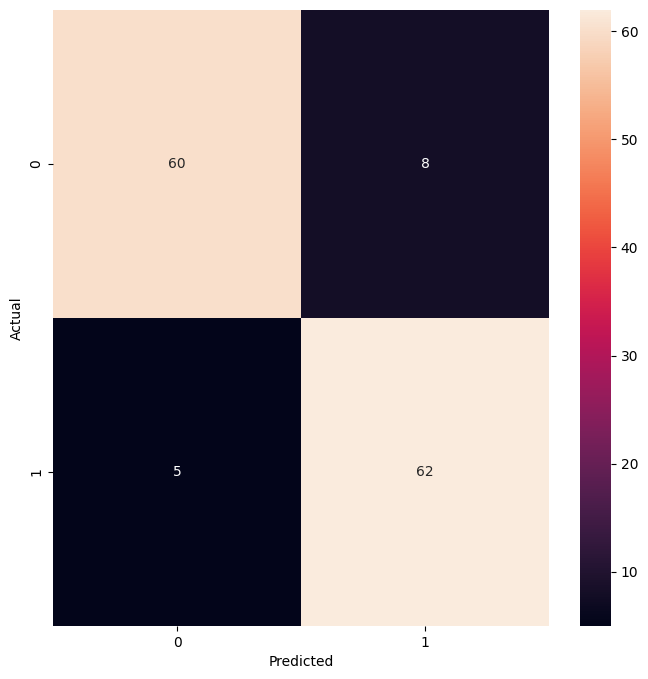

In [62]:
ann  = ANN(X_train,y_train)

predTrain,pred =  getPredPredTrain(ann)
metrics = getMetrics(y_test, pred,predTrain)
raw_data_Modles['ANN'] = metrics

### Voting classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [64]:

def VC(X,y):
    clf1 = SVC()
    clf2 = KNeighborsClassifier()
    clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

    eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
    eclf.fit(X,y)

    return eclf

(403,) (403,)


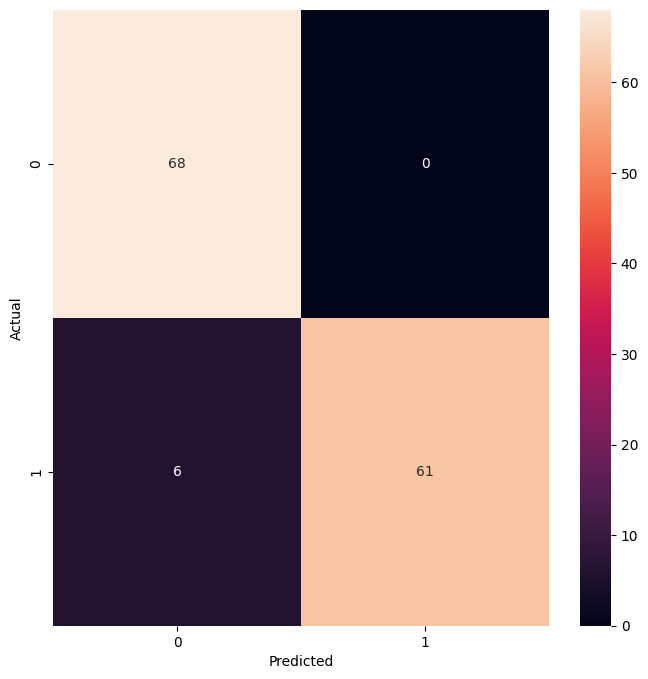

In [65]:
vc  = VC(X_train,y_train)

predTrain,pred =  getPredPredTrain(vc)
metrics = getMetrics(y_test, pred,predTrain)
raw_data_Modles['VC'] = metrics

In [66]:
metrics

{'accuracy': 0.9555555555555556,
 'train_accuracy': 0.9727047146401985,
 'precision': 1.0,
 'recall': 0.9104477611940298,
 'f1': 0.953125,
 'conf_matrix': array([[68,  0],
        [ 6, 61]]),
 'auc_roc': (0.9552238805970149,)}

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

def LR(X,y):

    log_reg = LogisticRegression()
    log_reg.fit(X,y)

    return log_reg

(403,) (403,)


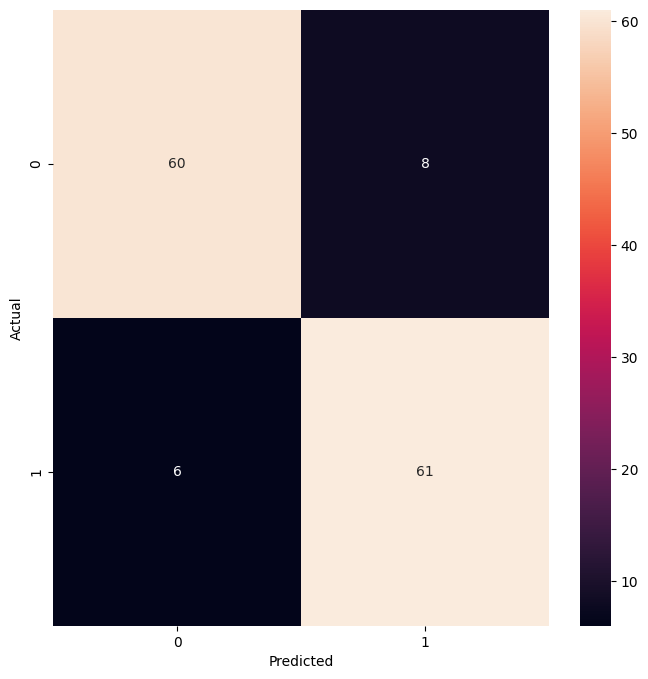

In [68]:
lr  = LR(X_train,y_train)

predTrain,pred =  getPredPredTrain(lr)
metrics = getMetrics(y_test, pred,predTrain)
raw_data_Modles['Logistic_Regresssion'] = metrics


### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
def DT(X,y):
    dt = DecisionTreeClassifier(random_state=0)
    dt.fit(X,y)
    return dt


(403,) (403,)


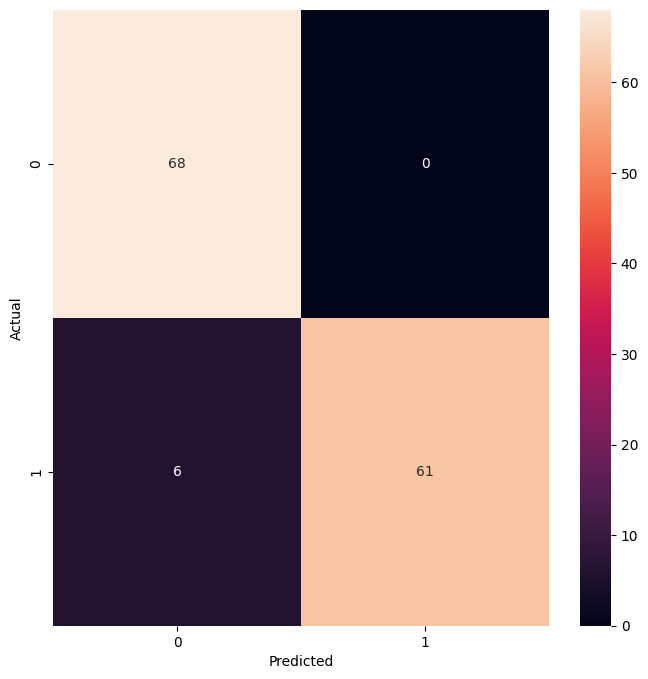

In [70]:
dt  = DT(X_train,y_train)

predTrain,pred =  getPredPredTrain(dt)
metrics = getMetrics(y_test, pred,predTrain)
raw_data_Modles['decision_tree'] = metrics


### Accuracy Comparison¶


In [71]:
df_model_result = pd.DataFrame(raw_data_Modles)
df_model_result

,SVM,rfc,KNN,ANN,VC,Logistic_Regresssion,decision_tree
accuracy,0.992593,0.97037,0.962963,0.903704,0.955556,0.896296,0.955556
train_accuracy,0.997519,1.0,1.0,0.930521,0.972705,0.923077,1.0
precision,1.0,1.0,1.0,0.885714,1.0,0.884058,1.0
recall,0.985075,0.940299,0.925373,0.925373,0.910448,0.910448,0.910448
f1,0.992481,0.969231,0.96124,0.905109,0.953125,0.897059,0.953125
conf_matrix,"[[68, 0], [1, 66]]","[[68, 0], [4, 63]]","[[68, 0], [5, 62]]","[[60, 8], [5, 62]]","[[68, 0], [6, 61]]","[[60, 8], [6, 61]]","[[68, 0], [6, 61]]"
auc_roc,"(0.9925373134328358,)","(0.9701492537313433,)","(0.9626865671641791,)","(0.9038630377524144,)","(0.9552238805970149,)","(0.8964003511852501,)","(0.9552238805970149,)"


### Selected Model - SVC



              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        67

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



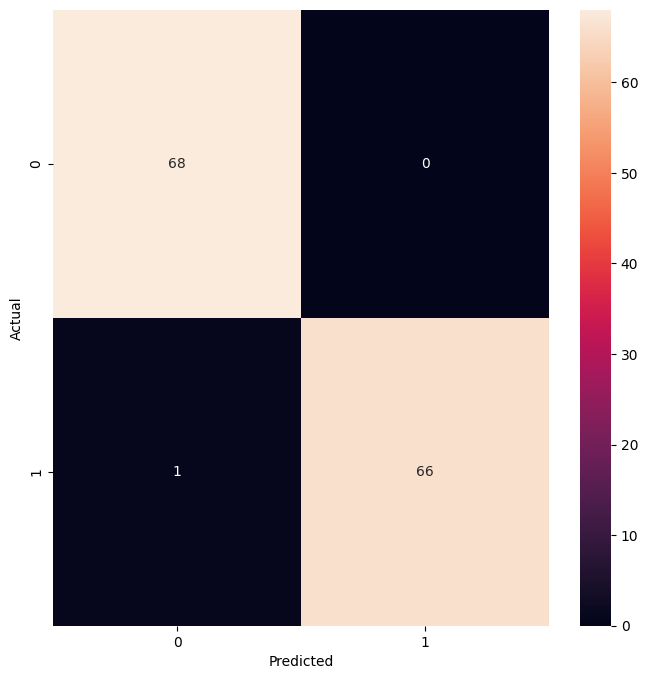

In [72]:
model = SVC(gamma=10,C=1)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

Only one misclassified data in the prediction of the model.




## ROC Curve

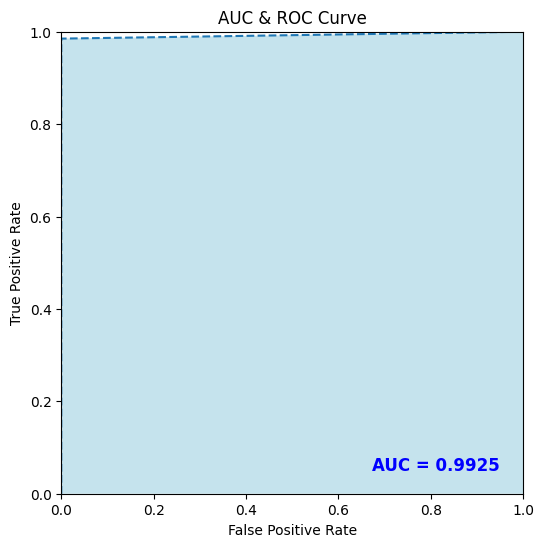

In [73]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Discussion & Conclusion

Discussion & Conclusion

The SVM model result is as follows.

 'accuracy': 0.9925925925925926,
 'train_accuracy': 1.0,
 'precision': 1.0,
 'recall': 0.9850746268656716,
 'f1': 0.9924812030075187,
 'conf_matrix': array([[68,  0],
        [ 1, 66]]),
 'auc_roc': (0.9925373134328358,

The model achieved best performance among all the trained models and the difference between accuracy and train_accuracy is not high so no overfitting and also precision and recall is also high which is so critical for health related models in order to reduce false positives and false negatives.



## Future Improvement

SVM has already achieved best but for the second best model RFC (Random Forest Classifier) we can make the model more improved by turning the hyperparameter and adding more data which faster to compute than SVM on large dataset more robust to imbalance dataset which usually come along with more data.
